![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [5]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [7]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

,Popularity
0,37.454012
1,95.071431
2,73.199394
3,59.865848
4,15.601864


## Analisis preliminar de datos (EDA)

#### Contexto del problema

Se quiere crear un sistema de recomendacion basado en las preferencias del ususario. 

Se quiere clasificar las canciones en base a caracteristicas de audio y generos disponibles.

#### Variables

**track_id**: The Spotify ID for the track

**artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

**album_name**: The album name in which the track appears

**track_name**: Name of the track

**popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

**duration_ms**: The track length in milliseconds

**explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

**loudness**: The overall loudness of a track in decibels (dB)

**mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

**track_genre**: The genre in which the track belongs

In [8]:
dataTraining.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
dataTraining.dtypes

track_id             object
artists              object
album_name           object
track_name           object
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
popularity            int64
dtype: object

In [10]:
# Memoria antes de optimización
mem_before = dataTraining.memory_usage(deep=True).sum() / 1024**2  # en MB

# Optimizar tipos de datos
for col in dataTraining.columns:
    col_type = dataTraining[col].dtype

    if col_type == 'float64':
        dataTraining[col] = dataTraining[col].astype('float32')
    elif col_type == 'int64':
        dataTraining[col] = dataTraining[col].astype('int32')
    elif col_type == 'bool':
        dataTraining[col] = dataTraining[col].astype('int8')  # más compacto
    elif col_type == 'object':
        num_unique_values = dataTraining[col].nunique()
        num_total_values = len(dataTraining[col])
        if num_unique_values / num_total_values < 0.5:
            dataTraining[col] = dataTraining[col].astype('category')

# Memoria después de optimización
mem_after = dataTraining.memory_usage(deep=True).sum() / 1024**2  # en MB

print(f'Memoria antes: {mem_before:.2f} MB')
print(f'Memoria después: {mem_after:.2f} MB')
print(f'Reducción: {100 * (mem_before - mem_after) / mem_before:.2f}%')

Memoria antes: 34.15 MB
Memoria después: 22.43 MB
Reducción: 34.33%


In [11]:
dataTraining.dtypes

track_id              object
artists             category
album_name          category
track_name            object
duration_ms            int32
explicit                int8
danceability         float32
energy               float32
key                    int32
loudness             float32
mode                   int32
speechiness          float32
acousticness         float32
instrumentalness     float32
liveness             float32
valence              float32
tempo                float32
time_signature         int32
track_genre         category
popularity             int32
dtype: object

In [12]:
# Revisar valores faltantes
missing = dataTraining.isnull().sum()
print("Valores nulos por columna:\n", missing[missing > 0])

# Revisar columnas con un solo valor
constant_columns = [col for col in dataTraining.columns if dataTraining[col].nunique() == 1]
print("Columnas constantes (sin variabilidad):", constant_columns)

# Eliminar columnas constantes
dataTraining.drop(columns=constant_columns, inplace=True)


Valores nulos por columna:
 Series([], dtype: int64)
Columnas constantes (sin variabilidad): []


In [13]:
# Revisar tipos de datos y ajustarlos si es necesario
for col in dataTraining.columns:
    if dataTraining[col].dtype == 'object':
        try:
            dataTraining[col] = pd.to_datetime(dataTraining[col])
            print(f"{col} convertido a datetime")
        except:
            pass


In [14]:
# Verificación general
print("Revisión final de nulos:", dataTraining.isnull().sum().sum())
print("Tamaño final del dataset:", dataTraining.shape)


Revisión final de nulos: 0
Tamaño final del dataset: (79800, 20)


In [15]:
# Visualización datos de entrenamiento
dataTraining.describe()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,2.279022e+05,0.085689,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076569,3.902556,33.265301
std,1.050599e+05,0.279906,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941936,0.434284,22.330871
min,1.338600e+04,0.000000,0.000000,0.000019,0.000000,-49.306999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.744360e+05,0.000000,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081251,4.000000,17.000000
50%,2.128130e+05,0.000000,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009003,4.000000,35.000000
75%,2.614260e+05,0.000000,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054001,4.000000,50.000000
max,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.604996,5.000000,100.000000


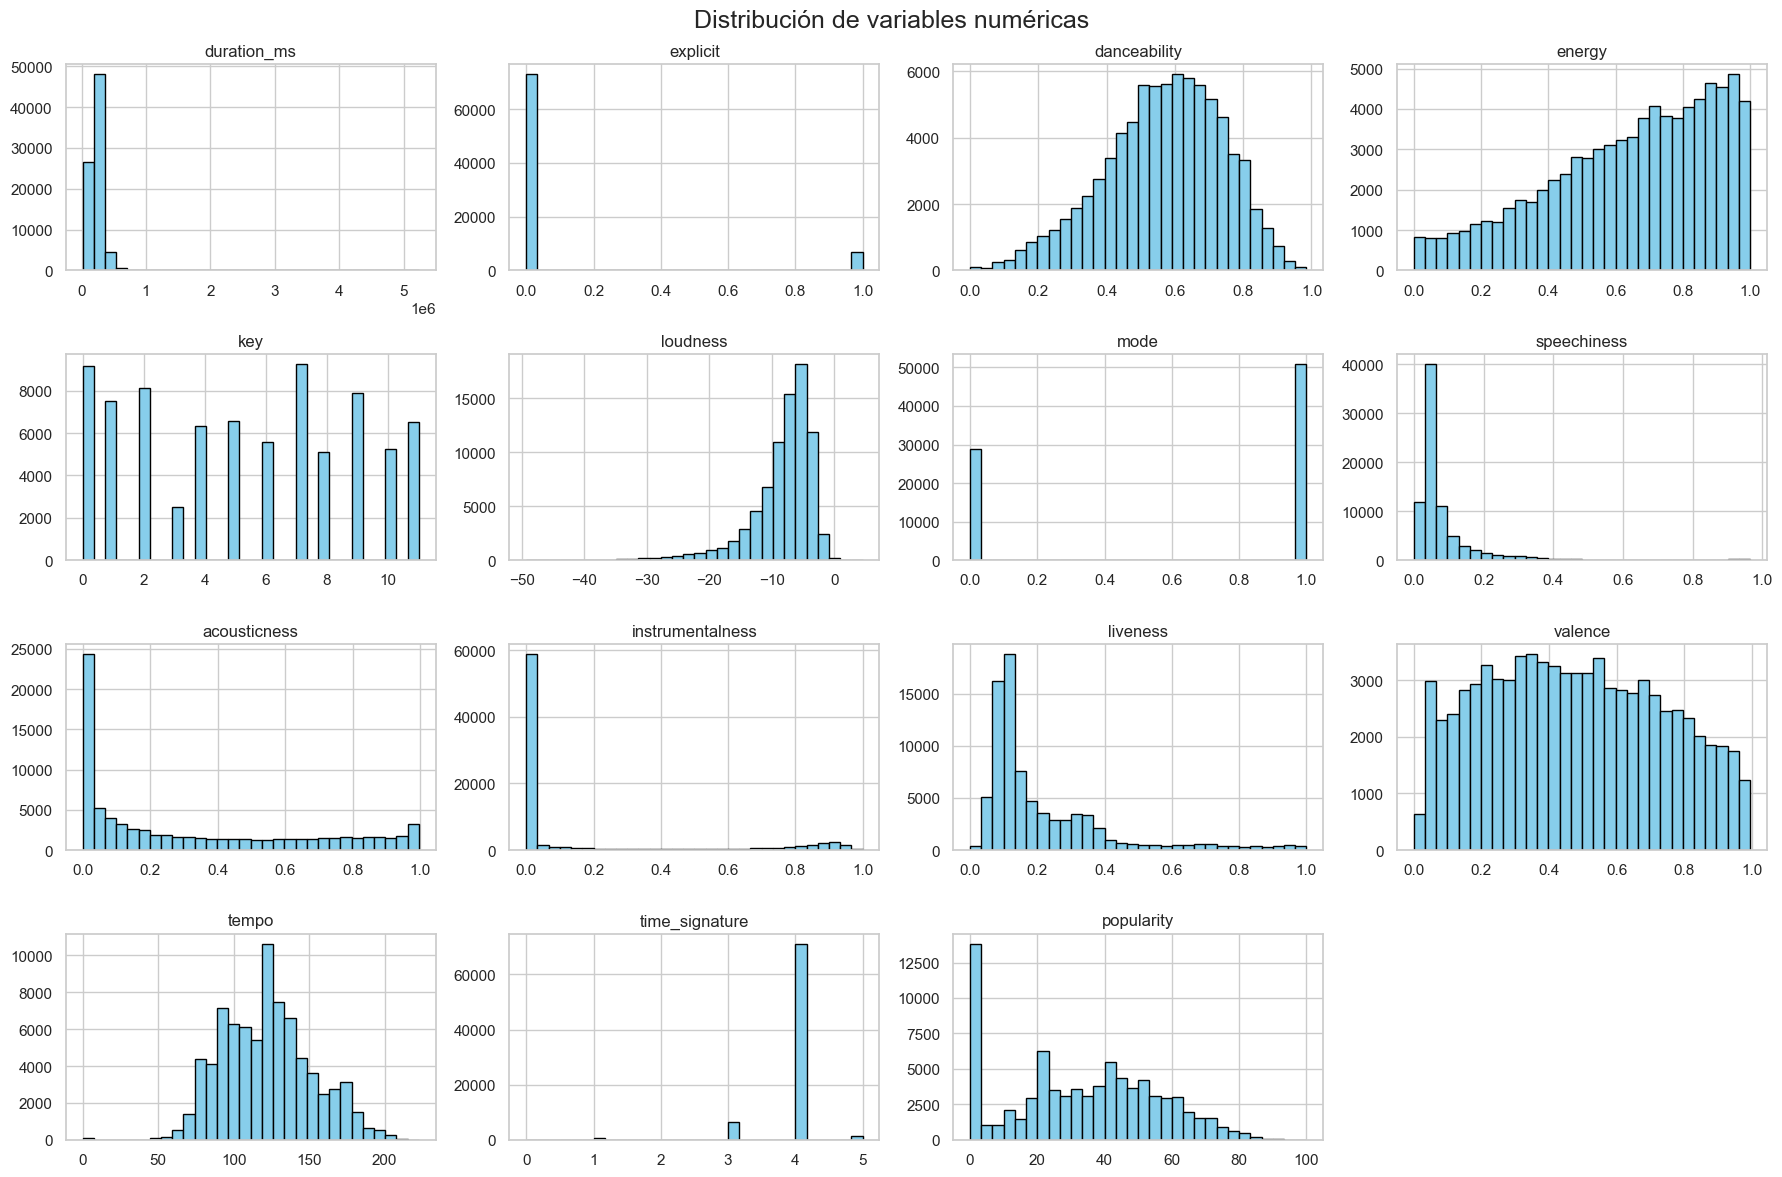

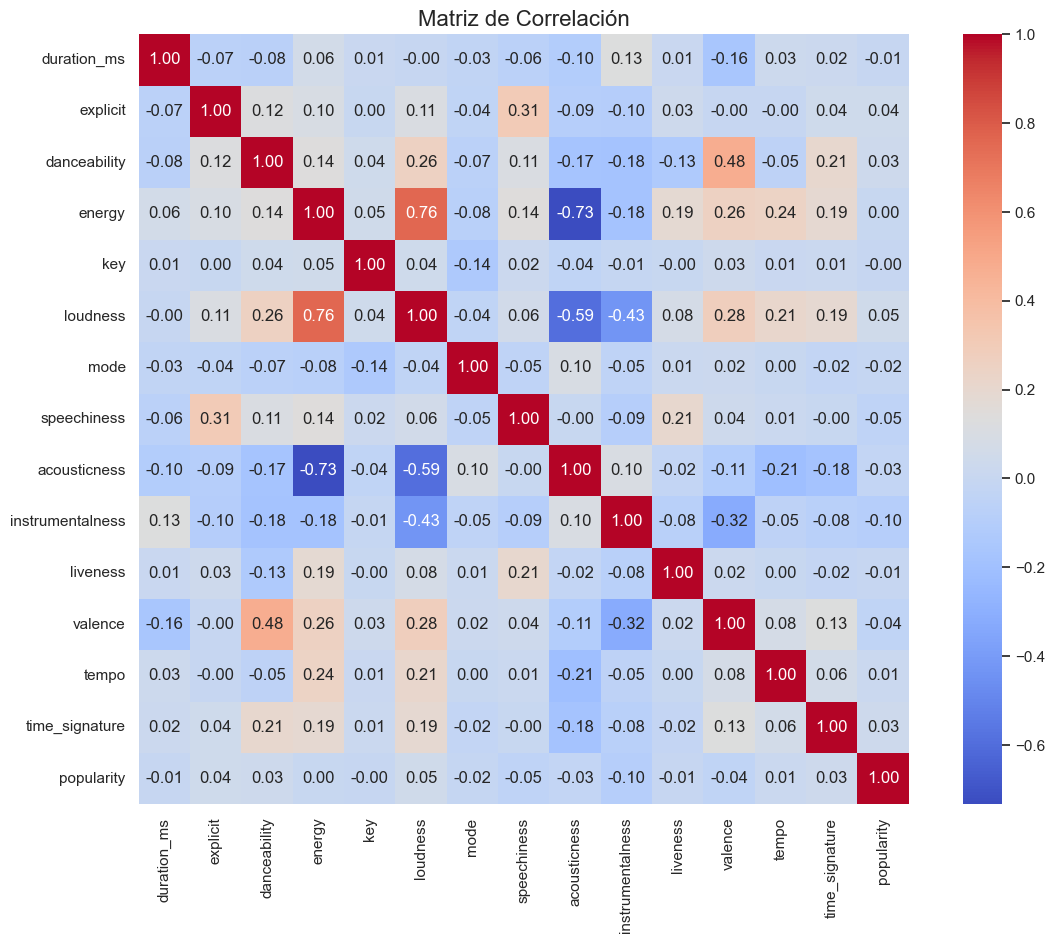

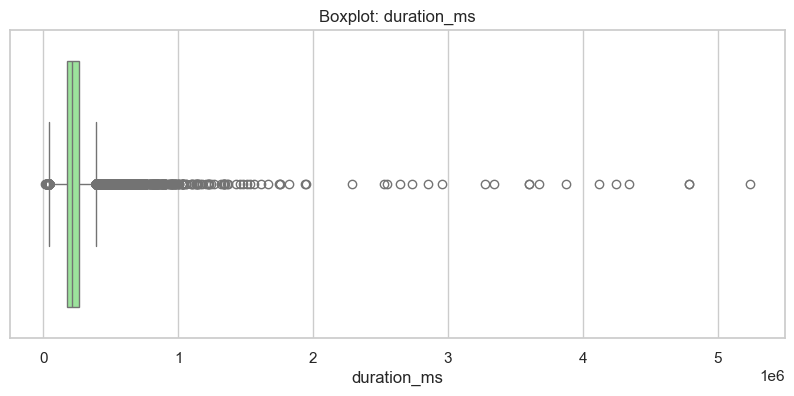

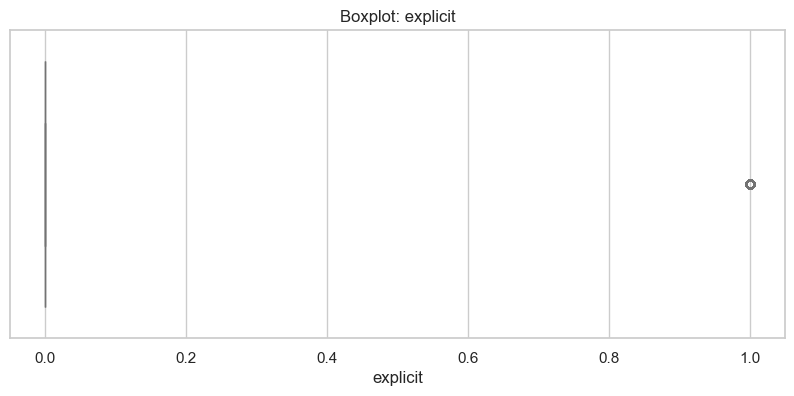

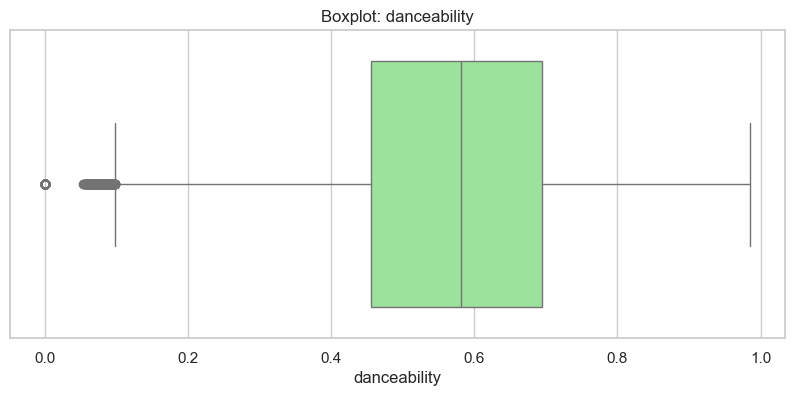

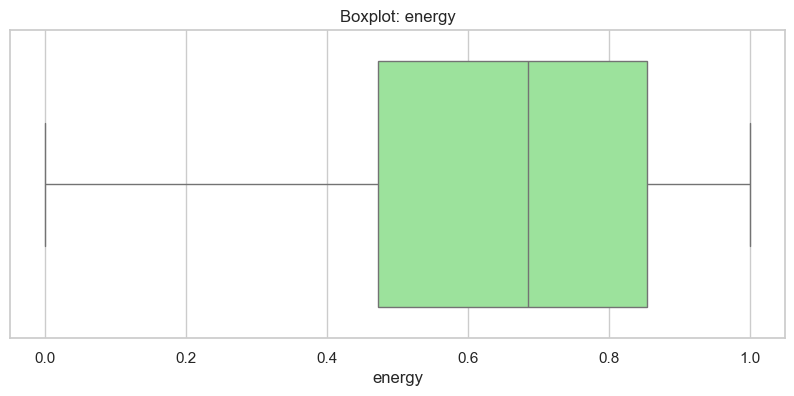

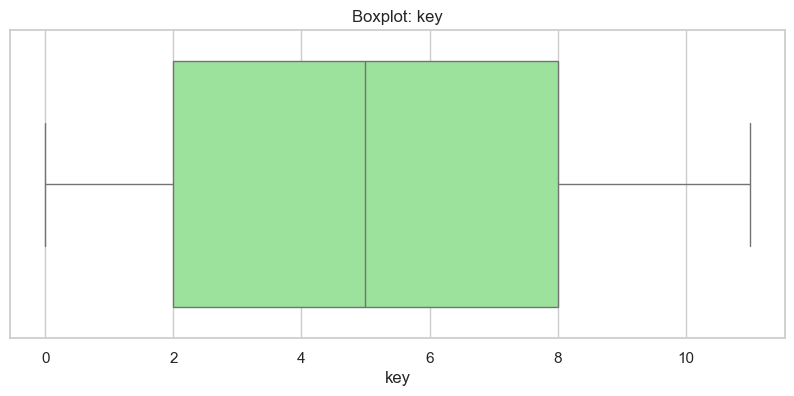

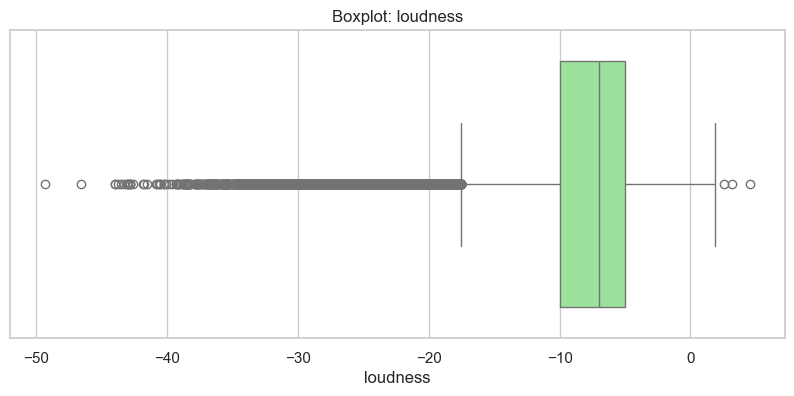

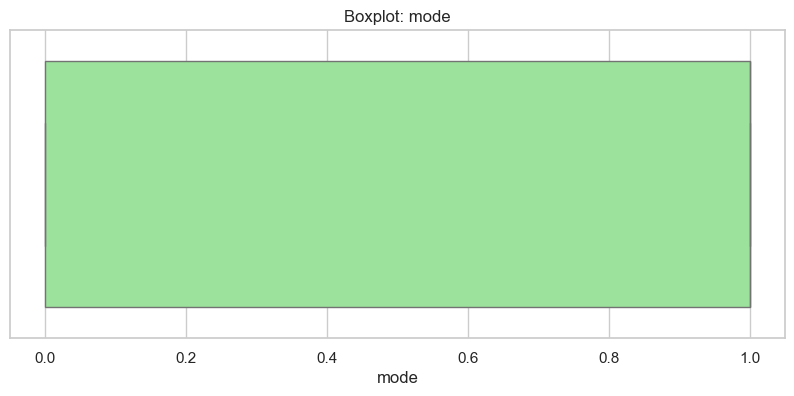

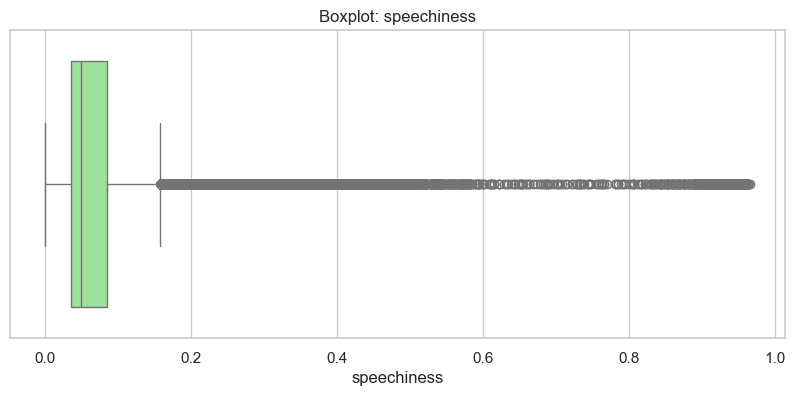

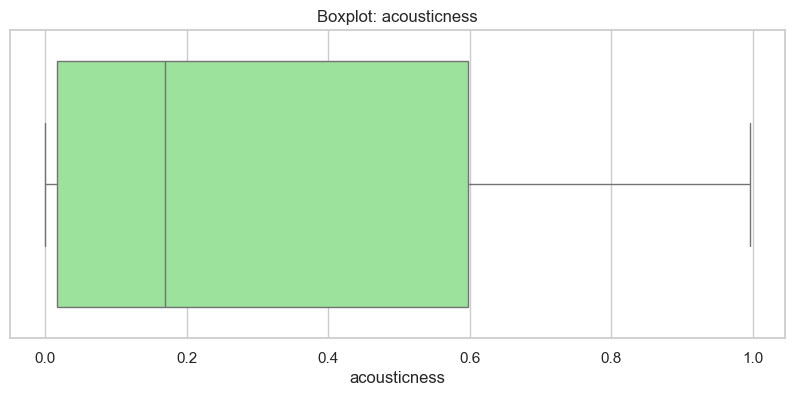

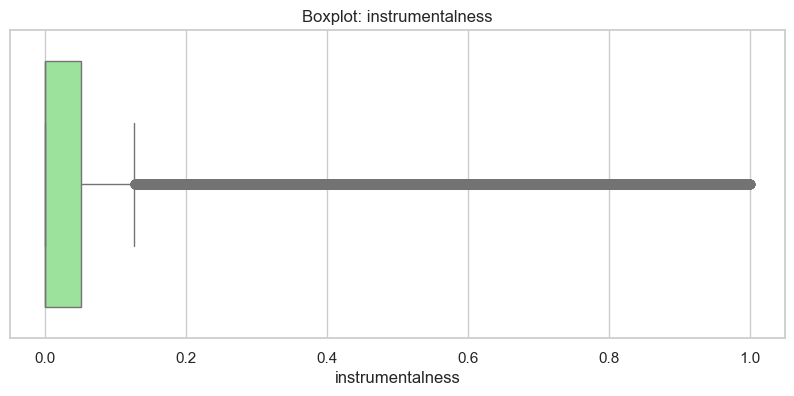

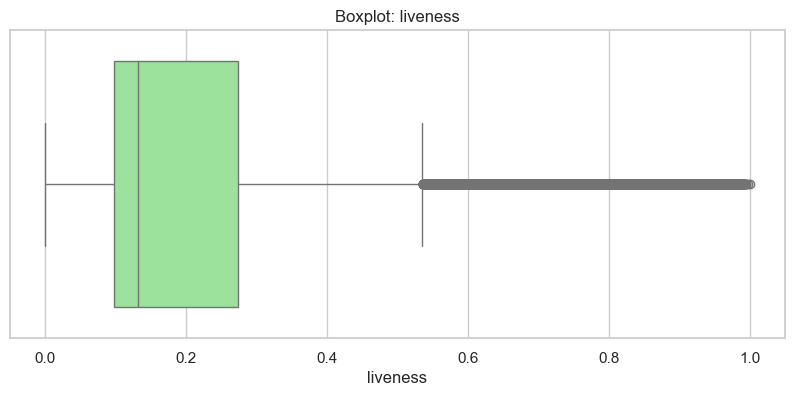

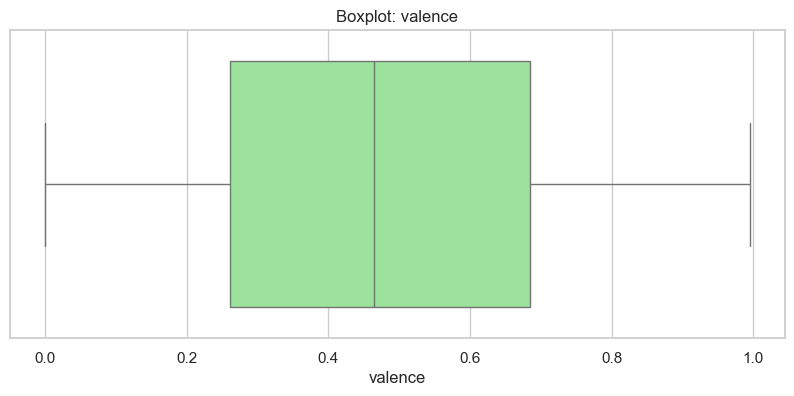

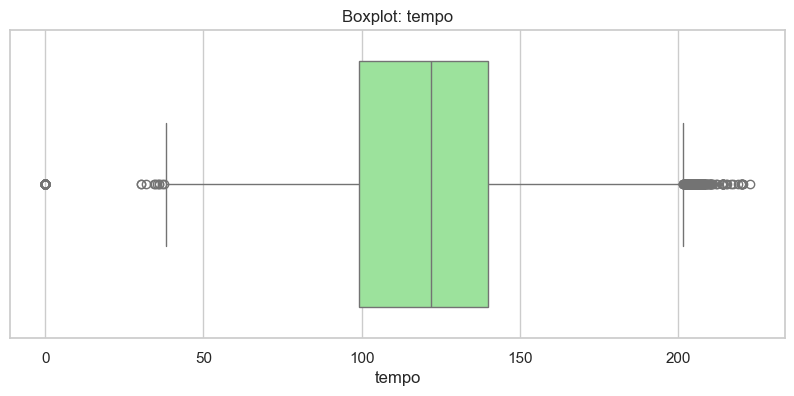

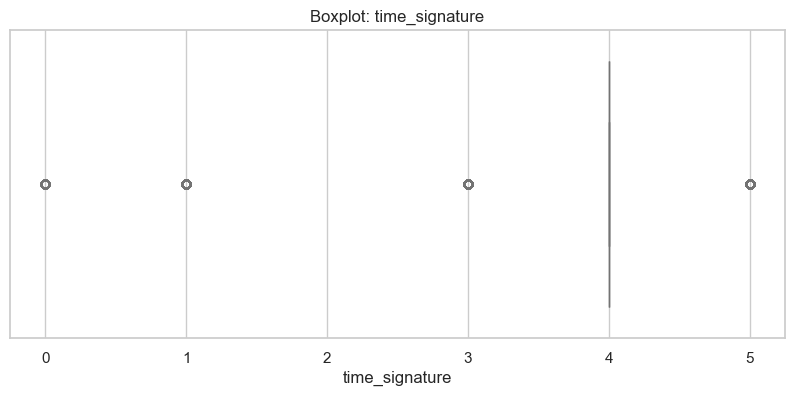

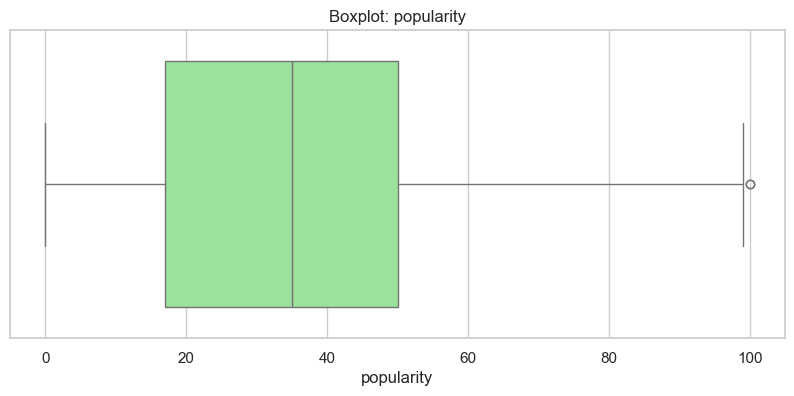

In [16]:
# Librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# --- 1. Histograma de variables numéricas ---
dataTraining.select_dtypes(include=np.number).hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=18)
plt.tight_layout()
plt.show()

# --- 2. Mapa de calor de correlación ---
plt.figure(figsize=(14, 10))
corr = dataTraining.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

# --- 3. Boxplots para identificar outliers ---
for col in dataTraining.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=dataTraining[col], color='lightgreen')
    plt.title(f"Boxplot: {col}")
    plt.show()


In [17]:
# --- Variables categóricas ---
cat_cols = dataTraining.select_dtypes(include=['object','category']).columns.tolist()

# Visualizar la cantidad de valores únicos por variable categórica
print("Valores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {dataTraining[col].nunique()} valores únicos")

# --- 1. Distribución de frecuencia de las principales categorías ---
for col in cat_cols:
    if dataTraining[col].nunique() <= 50:  # Limita el análisis a columnas con un número manejable de categorías
        plt.figure(figsize=(10, 5))
        dataTraining[col].value_counts().head(20).plot(kind='bar', color='cornflowerblue')
        plt.title(f"Top 20 valores de {col}")
        plt.ylabel("Frecuencia")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

# --- 2. Popularidad promedio por categoría ---
for col in cat_cols:
    if 'popularity' in dataTraining.columns and dataTraining[col].nunique() <= 50:
        popularity_by_cat = dataTraining.groupby(col)['popularity'].mean().sort_values(ascending=False).head(20)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=popularity_by_cat.values, y=popularity_by_cat.index, palette="viridis")
        plt.title(f"Popularidad promedio por {col} (Top 20)")
        plt.xlabel("Popularidad Promedio")
        plt.ylabel(col)
        plt.show()


Valores únicos por variable categórica:
track_id: 66720 valores únicos
artists: 25775 valores únicos
album_name: 37315 valores únicos
track_name: 55767 valores únicos
track_genre: 114 valores únicos


In [18]:
# Agrupar por 'track_genre' y calcular las medias de las columnas seleccionadas
perfil_generos = dataTraining.groupby('track_genre')[dataTraining.select_dtypes(include=np.number).columns].mean().round(2).sort_values('popularity', ascending=False)

# Mostrar el perfil
print(perfil_generos)

                duration_ms  explicit  danceability  energy   key  loudness  \
track_genre                                                                   
pop-film          279722.57      0.00          0.59    0.60  5.23     -7.89   
k-pop             254177.60      0.05          0.65    0.68  5.46     -6.43   
chill             169200.60      0.17          0.67    0.42  5.33    -10.52   
sad               154555.27      0.45          0.69    0.47  5.44    -10.20   
grunge            236282.95      0.07          0.45    0.80  5.29     -5.63   
...                     ...       ...           ...     ...   ...       ...   
chicago-house     357606.00      0.02          0.77    0.73  5.86     -9.23   
detroit-techno    370444.11      0.01          0.72    0.72  5.68    -11.01   
latin             213044.33      0.12          0.72    0.72  5.47     -5.28   
romance           202043.54      0.00          0.43    0.29  5.19    -13.21   
iranian           316496.70      0.08          0.30 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = dataTraining.drop(columns=['popularity', 'track_id', 'track_genre', 'track_name', 'artists', 'album_name'])
y = dataTraining['popularity']

Mean Squared Error (MSE): 482.8420
R-squared (R²): 0.0340


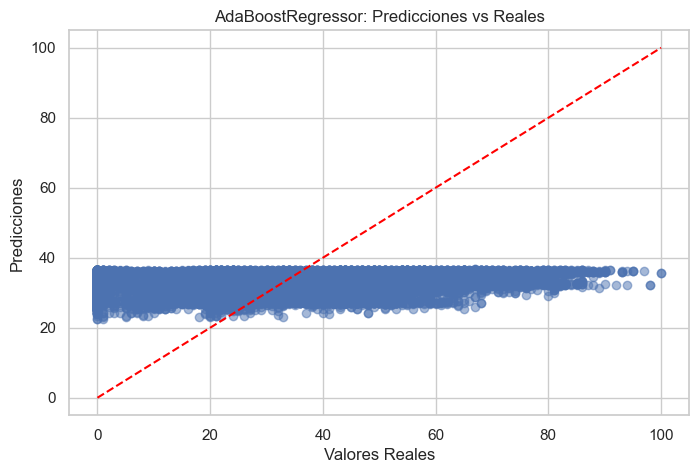

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

base_estimator = DecisionTreeRegressor(max_depth=3)

model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("AdaBoostRegressor: Predicciones vs Reales")
plt.grid(True)
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df = dataTraining.copy()

categorical_cols = df.select_dtypes(include=['object','category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # asegúrate de convertir a str si hay valores nulos
    label_encoders[col] = le  # guardar para transformar nuevos datos después si es necesario


In [24]:
X = df.drop(columns=['popularity']) 
y = df['popularity']

In [25]:
print("Primeras filas de X:")
X.head()

Primeras filas de X:


,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,64239,13481,18054,29483,211533,0,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.792999,4,41
1,50962,7754,10815,1549,196000,0,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.684998,4,76
2,60021,21526,28726,35849,216506,0,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459000,3,54
3,13905,8029,24834,25598,218346,0,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442001,3,16
4,35296,20008,26251,44199,173160,0,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981003,4,109


Mean Squared Error (MSE): 217.5765
R-squared (R²): 0.5647


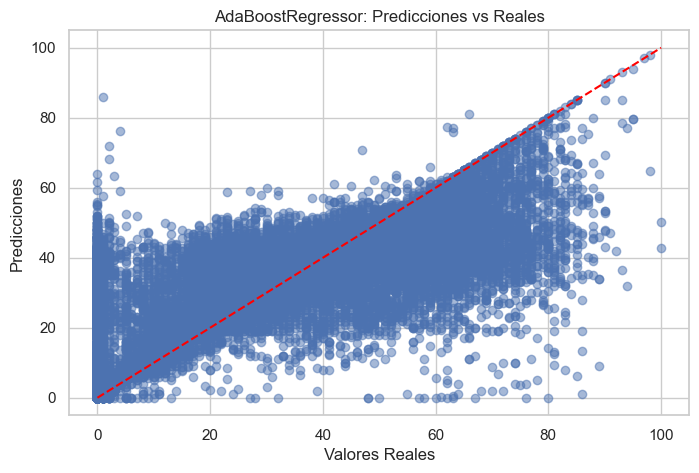

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

base_estimator = DecisionTreeRegressor(max_depth=20)

model = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("AdaBoostRegressor: Predicciones vs Reales")
plt.grid(True)
plt.show()

In [38]:

import category_encoders as ce

In [39]:
encoder = ce.TargetEncoder(cols=categorical_cols)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

X_train_encoded.drop(columns=['track_id', 'track_name'], inplace=True)
X_test_encoded.drop(columns=['track_id', 'track_name'], inplace=True)

In [59]:
nestimator = 100
learningrate = 0.1
maxdepth = 15

In [60]:
base_estimator = DecisionTreeRegressor(max_depth=maxdepth, min_samples_leaf=3, random_state=0)

modellinear = AdaBoostRegressor(estimator=base_estimator, n_estimators=nestimator, learning_rate=learningrate, loss='linear', random_state=0)
modelsquare = AdaBoostRegressor(estimator=base_estimator, n_estimators=nestimator, learning_rate=learningrate, loss='square', random_state=0)
modelexponential = AdaBoostRegressor(estimator=base_estimator, n_estimators=nestimator, learning_rate=learningrate, loss='exponential', random_state=0)

modellinear.fit(X_train_encoded, y_train)
modelsquare.fit(X_train_encoded, y_train)
modelexponential.fit(X_train_encoded, y_train)

y_pred_lineal = modellinear.predict(X_test_encoded)
y_pred_square = modelsquare.predict(X_test_encoded)
y_pred_exponential = modelexponential.predict(X_test_encoded)

In [61]:
# Crear un diccionario con los resultados
results = {
    "Modelo": ["AdaBoost Linear", "AdaBoost Square", "AdaBoost Exponential"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lineal),
        mean_squared_error(y_test, y_pred_square),
        mean_squared_error(y_test, y_pred_exponential)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lineal)),
        np.sqrt(mean_squared_error(y_test, y_pred_square)),
        np.sqrt(mean_squared_error(y_test, y_pred_exponential))
    ],
    "R2": [
        r2_score(y_test, y_pred_lineal),
        r2_score(y_test, y_pred_square),
        r2_score(y_test, y_pred_exponential)
    ]
}

# Crear DataFrame para visualizar
results_df = pd.DataFrame(results)

# Mostrar resultados ordenados por RMSE ascendente (mejor desempeño)
results_df.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

,Modelo,MSE,RMSE,R2
0,AdaBoost Linear,137.577703,11.729352,0.724753
1,AdaBoost Exponential,138.682856,11.776369,0.722542
2,AdaBoost Square,140.491941,11.852930,0.718922


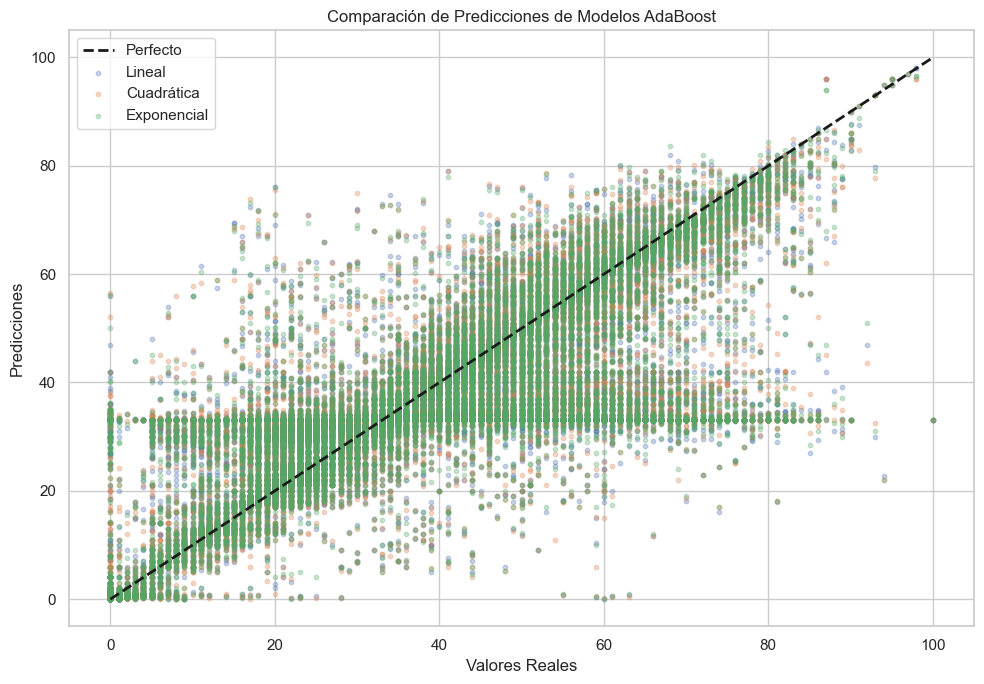

In [58]:
plt.figure(figsize=(10, 7))

# Línea de referencia perfecta
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfecto')

# Gráficas de predicciones
plt.scatter(y_test, y_pred_lineal, alpha=0.3, label="Lineal", s=10)
plt.scatter(y_test, y_pred_square, alpha=0.3, label="Cuadrática", s=10)
plt.scatter(y_test, y_pred_exponential, alpha=0.3, label="Exponencial", s=10)

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de Predicciones de Modelos AdaBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


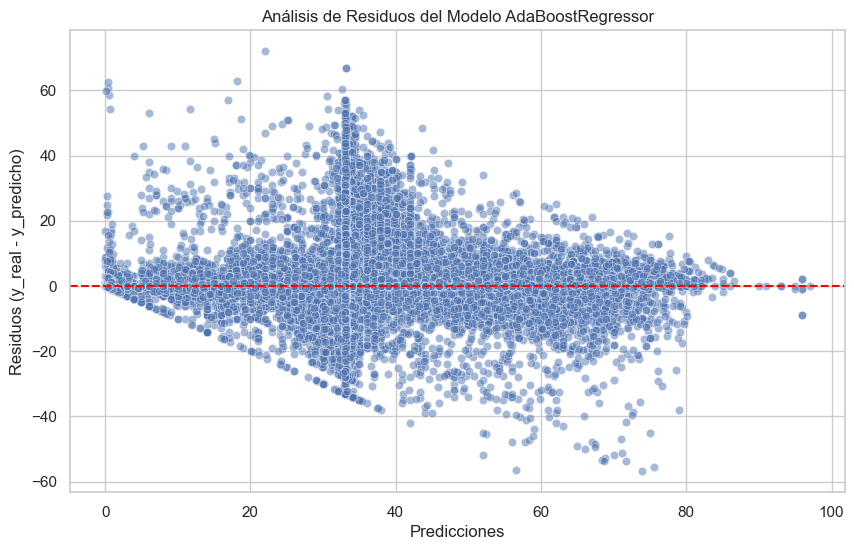

In [48]:
# Cálculo de los residuos
residuos = y_test - y_pred

# Configuración del estilo gráfico
sns.set(style="whitegrid")

# Gráfico de residuos vs predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos (y_real - y_predicho)")
plt.title("Análisis de Residuos del Modelo AdaBoostRegressor")
plt.show()

In [44]:
# Crear DataFrame con resultados
df_resultados = X_test_encoded.copy()  # copia las features

df_resultados['Prediccion'] = y_pred
df_resultados['Real'] = y_test.values

df_resultados_ordenado = df_resultados.sort_values(by='Prediccion', ascending=False)

# Mostrar los primeros registros ordenados
df_resultados_ordenado.to_csv('resultados_ordenados.csv', index=False)

In [45]:
# Guardar predicciones en formato exigido en la competencia de kaggle
X_testing_encoded = encoder.transform(dataTesting)
X_testing_encoded.drop(columns=['track_id', 'track_name'], inplace=True)  # eliminar track_id del conjunto de test
y_pred = model.predict(X_testing_encoded)  # predicción sobre el conjunto de test

# Convertir y_pred a DataFrame
y_pred_df = pd.DataFrame(y_pred, index=dataTesting.index, columns=['Popularity'])

# Guardar en CSV
y_pred_df.to_csv('test_submission_file.csv', index_label='ID')
y_pred_df.head()

,Popularity
0,33.242775
1,33.022222
2,33.038961
3,33.000000
4,33.000000
